In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
train=pd.read_csv("../input/train/train.csv")
train

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train.isnull().sum()

In [ ]:
train.datetime = train.datetime.apply(pd.to_datetime)
train.info()

In [ ]:
col_cat = ["season","weather","holiday","workingday"]
for var in col_cat:
    train[var] = train[var].astype("category")

In [ ]:
train.info()

In [ ]:
train

In [ ]:
train["Demand"]=train["count"].copy()
train.pop('count')

In [ ]:
train

In [ ]:
train

In [ ]:
#plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(train['temp'], train['Demand'], c='r')

In [ ]:
plt.title('atemp Vs Demand')
plt.scatter(train['atemp'], train['Demand'],)
plt.show()

In [ ]:
plt.title('atemp VS Demand')
x1=pd.Series(train["atemp"])
y1=pd.Series(train["Demand"])
#x=train["atemp"]
#y=train["Demand"]
plt.plot(x1,y1,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()

In [ ]:
sns.scatterplot(x="temp", y="atemp", data=train, hue="Demand")
plt.show()

In [ ]:
plt.title('Humidity Vs Demand')
plt.scatter(train['humidity'], train['Demand'], c='b')

In [ ]:
sns.scatterplot(x="windspeed", y="Demand", data=train, hue="Demand")
plt.show()

In [ ]:
train.info()

In [ ]:

colors = ['g', 'r', 'm', 'b']
plt.title('Average Demand per Season')
cat_list = train['season'].unique()
cat_average = train.groupby('season')['Demand'].mean()
plt.bar(cat_list, cat_average, color=colors)

In [ ]:
train.info()

In [ ]:
colors=['r','b']
plt.title("Holiday VS Demand")
cal_h_list=train["holiday"].unique()
cal_m_d_list=train.groupby("holiday")["Demand"].mean()
plt.bar(cal_h_list,cal_m_d_list,color=colors)
plt.show()

In [ ]:
plt.title('Average Demand per Workingday')
cat_list = train['workingday'].unique()
cat_average = train.groupby('workingday').mean()['Demand']
plt.bar(cat_list, cat_average, color=colors)

In [ ]:
plt.title('Average Demand per Weather')
cat_list = train['weather'].unique()
cat_average = train.groupby('weather').mean()['Demand']
plt.bar(cat_list, cat_average, color=colors)

In [ ]:
sns.set_style('darkgrid')
sns.distplot(train['Demand'], bins = 100, color = 'blue')

In [ ]:
#Q-Q Plot
from scipy import stats
plt = stats.probplot(train['Demand'], plot=sns.mpl.pyplot)

In [ ]:
sns.boxplot(x = 'Demand', data = train, color = 'blue')

Outlier Analysis

In [ ]:
#Calculating the number of outliers
Q1 = train['Demand'].quantile(0.25)
Q3 = train['Demand'].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train['Demand'] < (Q1 - 1.5 * IQR)) | (train['Demand'] > (Q3 + 1.5 * IQR))]
print((len(outliers)/len(train))*100)

In [30]:
train_final = train[np.abs(train["Demand"]-train["Demand"].mean())<=(3*train["Demand"].std())]
print ("Shape Of The Before Ouliers: ",train.shape)
print ("Shape Of The After Ouliers: ",train_final.shape)

Shape Of The Before Ouliers:  (10886, 12)
Shape Of The After Ouliers:  (10739, 12)


In [31]:
#Multiple Linear regression

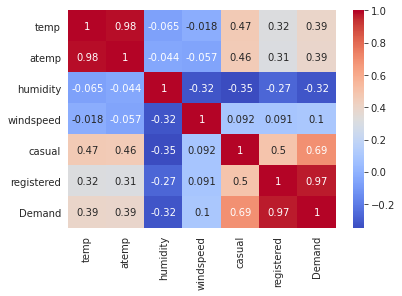

In [32]:
tc = train.corr()
sns.heatmap(tc,annot = True,  cmap = 'coolwarm')

In [33]:
train_final = train_final.drop(['temp', 'atemp','casual', 'registered'], axis=1)
train_final

,datetime,season,holiday,workingday,weather,humidity,windspeed,Demand
0,2011-01-01 00:00:00,1,0,0,1,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,75,0.0000,1
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,61,6.0032,129


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45313028, 0.46294948, 0.48786694, 0.49710584, 0.48142242,
        0.4914672 , 0.5400629 , 0.60589284, 0.66782665, 0.72842216,
        0.813061  , 0.92683583, 1.        , 0.92683583, 0.813061  ,
        0.72842216, 0.66782665, 0.60589284, 0.5400629 , 0.4914672 ,
        0.48142242, 0.49710584, 0.48786694, 0.46294948, 0.45313028],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f3b600cb0d0>)

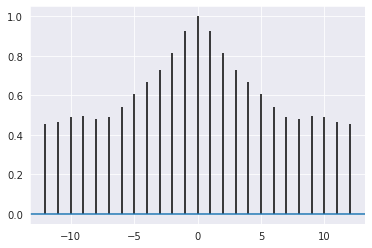

In [34]:
import matplotlib.pyplot as plt
# Autocorrelation of demand using acor
train1 = pd.to_numeric(train_final['Demand'], downcast='float')
plt.acorr(train1, maxlags=12)

In [35]:
#Normality Check

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.348699012122978, 4.562423868087808, 0.9581176780909615))

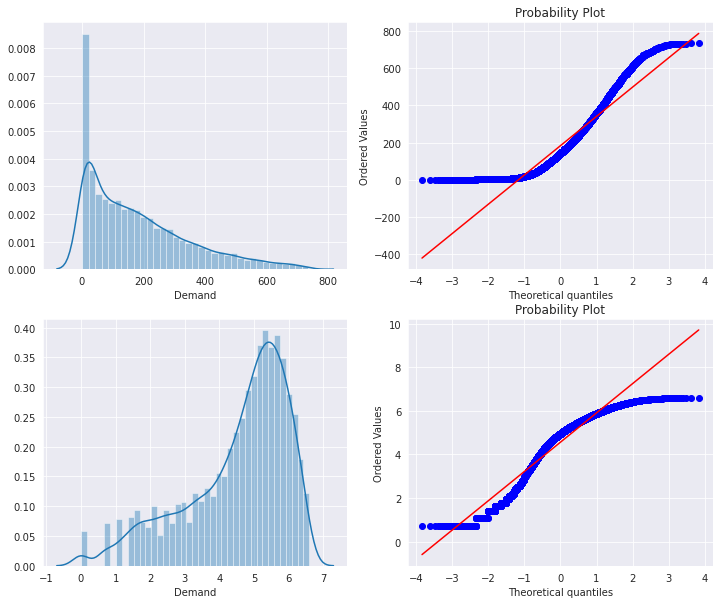

In [36]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(train_final["Demand"],ax=axes[0][0])
stats.probplot(train_final["Demand"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(train_final["Demand"]),ax=axes[1][0])
stats.probplot(np.log1p(train_final["Demand"]), dist='norm', fit=True, plot=axes[1][1])

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 2.0275929 , 2.02777261,
         2.02795205])),
 (0.31674312862148746, 1.657769299337124, 0.8898054204236383))

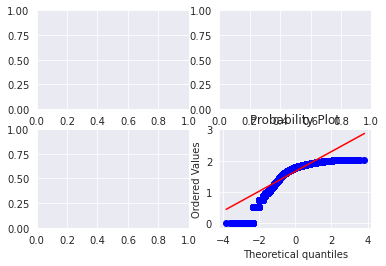

In [37]:
train_final['Demand'] = np.log(train_final['Demand'])
fig,axes = plt.subplots(ncols=2,nrows=2)
stats.probplot(np.log1p(train_final["Demand"]), dist='norm', fit=True, plot=axes[1][1])

In [38]:
print(train_final["Demand"],train["Demand"])

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
10881    5.817111
10882    5.484797
10883    5.123964
10884    4.859812
10885    4.477337
Name: Demand, Length: 10739, dtype: float64 0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: Demand, Length: 10886, dtype: int64


In [39]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = train_final['Demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = train_final['Demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = train_final['Demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

train_final_lag = pd.concat([train_final, t_1, t_2, t_3], axis=1)

In [40]:
train_final_lag.head()

,datetime,season,holiday,workingday,weather,humidity,windspeed,Demand,t-1,t-2,t-3
0,2011-01-01 00:00:00,1,0,0,1,81,0.0,2.772589,NaN,NaN,NaN
1,2011-01-01 01:00:00,1,0,0,1,80,0.0,3.688879,2.772589,NaN,NaN
2,2011-01-01 02:00:00,1,0,0,1,80,0.0,3.465736,3.688879,2.772589,NaN
3,2011-01-01 03:00:00,1,0,0,1,75,0.0,2.564949,3.465736,3.688879,2.772589
4,2011-01-01 04:00:00,1,0,0,1,75,0.0,0.000000,2.564949,3.465736,3.688879


In [41]:
train_final_lag = train_final_lag.dropna()

In [42]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'Demand'],
      dtype='object')

In [43]:
train_final_lag['windspeed'].value_counts()

0.0000     1294
8.9981     1109
11.0014    1037
7.0015     1027
12.9980    1027
15.0013     942
6.0032      866
16.9979     807
19.0012     664
19.9995     486
22.0028     366
23.9994     272
26.0027     231
27.9993     187
30.0026     109
31.0009      89
32.9975      79
35.0008      56
39.0007      26
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [44]:
from sklearn.ensemble import RandomForestRegressor
train_Wind_0 = train_final_lag[train_final_lag["windspeed"]==0]
train_Wind_Not0 = train_final_lag[train_final_lag["windspeed"]!=0]
Columns = ["season","weather","humidity"]
rf_model = RandomForestRegressor()
rf_model.fit(train_Wind_Not0[Columns],train_Wind_Not0["windspeed"])

wind0Values = rf_model.predict(X= train_Wind_0[Columns])
train_Wind_0["windspeed"] = wind0Values
data = train_Wind_Not0.append(train_Wind_0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [45]:
data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
humidity               int64
windspeed            float64
Demand               float64
t-1                  float64
t-2                  float64
t-3                  float64
dtype: object

In [46]:
#Dummy Variable using one hot encoding

In [47]:
data = pd.get_dummies(data, drop_first=True)

In [48]:
data.columns

Index(['datetime', 'humidity', 'windspeed', 'Demand', 't-1', 't-2', 't-3',
       'season_2', 'season_3', 'season_4', 'holiday_1', 'workingday_1',
       'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [49]:
data.shape

(10736, 15)

In [50]:
#end of data analysis